<a href="https://colab.research.google.com/github/Xmoonie/QtDemo/blob/master/Mentor_Session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [ ]:
from __future__ import print_function
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

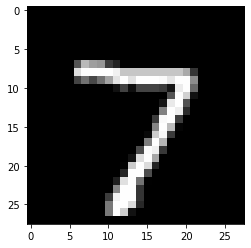

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# plt.imshow(x_train[0,:,:])
plt.imshow(x_test[0,:,:], cmap='gray')
plt.show()
# print(x_train[0].shape)

In [ ]:
import pandas as pd

pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(x_train.shape)


(60000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='prob'))

![替代文字](https://drive.google.com/uc?id=13itcpOUQjL6Ycm4IxiYKV9_29tk36yoH)


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              #optimizer=keras.optimizers.Adadelta(),
              optimizer = keras.optimizers.SGD(learning_rate = 0.1),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
prob (Dense)                 (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
______________________________________________

### Train the Model

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 48s 9ms/step - loss: 0.6544 - accuracy: 0.7991 - val_loss: 0.0989 - val_accuracy: 0.9698
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0961 - accuracy: 0.9709 - val_loss: 0.0636 - val_accuracy: 0.9796
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0484 - val_accuracy: 0.9834
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.0476 - val_accuracy: 0.9837
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0482 - val_accuracy: 0.9841
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0389 - val_accuracy: 0.9869
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch

### Evaluate the Model

In [ ]:
from tensorflow.keras.models import Model

layer_model = Model(inputs=model.input,
                    outputs=model.get_layer('prob').output)

output = layer_model.predict(x_test[0][np.newaxis, :])
print(output)

[[4.0779356e-11 5.2231455e-11 1.8851150e-10 4.7331287e-07 1.8489470e-13
  2.5851035e-10 2.5419310e-17 9.9999881e-01 2.5171124e-10 7.0571247e-07]]


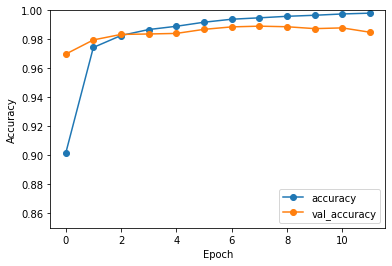

In [ ]:
plt.plot(history.history['accuracy'], '-o', label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.85, 1])
plt.legend(loc='lower right')

## FASHION MNIST Classification

<center>
  <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">
</center>

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


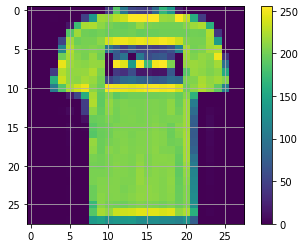

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(x_train[1])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,49,136,219,216,228,236,255,255,255,255,217,215,254,231,160,45,0,0,0,0,0
2,0,0,0,0,0,14,176,222,224,212,203,198,196,200,215,204,202,201,201,201,209,218,224,164,0,0,0,0
3,0,0,0,0,0,188,219,200,198,202,198,199,199,201,196,198,198,200,200,200,200,201,200,225,41,0,0,0
4,0,0,0,0,51,219,199,203,203,212,238,248,250,245,249,246,247,252,248,235,207,203,203,222,140,0,0,0
5,0,0,0,0,116,226,206,204,207,204,101,75,47,73,48,50,45,51,63,113,222,202,206,220,224,0,0,0
6,0,0,0,0,200,222,209,203,215,200,0,70,98,0,103,59,68,71,49,0,219,206,214,210,250,38,0,0
7,0,0,0,0,247,218,212,210,215,214,0,254,243,139,255,174,251,255,205,0,215,217,214,208,220,95,0,0
8,0,0,0,45,226,214,214,215,224,205,0,42,35,60,16,17,12,13,70,0,189,216,212,206,212,156,0,0
9,0,0,0,164,235,214,211,220,216,201,52,71,89,94,83,78,70,76,92,87,206,207,222,213,219,208,0,0


# Task 2

In [ ]:
np.random.seed(0)
nClasses = 2
nClusters = 10
nDim = 2
nSamples = 1500

In [ ]:
# generate label Y (1-D array of size nSamples) by using random.random.choice

Y = np.random.choice(nClasses, [nSamples])
print(Y)

[0 1 1 ... 1 0 0]


In [ ]:
# generate another parameter Z for each sample, so Z is a 1-D array of size nSamples. each element takes value from 0-19, tells you which cluster center our sample X is close.

Z = np.random.choice(nClusters, [nSamples]) + Y * nClusters
print(Z)
print(Z.shape)

[ 2 12 19 ... 19  0  9]
(1500,)


In [ ]:
# gengerate 20 cluster centers as a 20*2 matrix. each row is a cluster center's coordinate

cluster_centers = np.random.normal(0, 10, [nClusters * nClasses, nDim])
centers = cluster_centers[Z,:]

print(cluster_centers.shape)
print(centers)
print(centers.shape)

(20, 2)
[[  6.41237905  -2.01144727]
 [  2.46703107  -7.68288478]
 [ 13.26172337   1.87326378]
 ...
 [ 13.26172337   1.87326378]
 [  2.39065305 -11.3140658 ]
 [ -2.35355643  -2.43394826]]
(1500, 2)


In [ ]:
# generate X by first generating a nSamples*2 matrix with standard Gaussian elements and then shift X according to Z

X = np.random.normal(0, 1, [nSamples, nDim]) + centers
print(X)
print(X.shape)

[[  5.52867023  -1.26990909]
 [  3.00351207  -6.46297636]
 [ 13.35577353   0.29288934]
 ...
 [ 14.82341341   2.02690817]
 [  2.38308145 -12.08803957]
 [ -3.57332654  -1.95840634]]
(1500, 2)


In [ ]:
def generateSamples(nSamples, nDim, nClasses, nClusters):
    '''
    Generate samples as Normal from (nClasses * nClusters) clusters
    assume each cluster has the same variance for now
    
    return X :  np.array of size [nSamples, nDim]

                each sample generated as a nDim Normal, belong to a Cluster
           
            Y:  np.array of size [nSamples] 
                only gives the class label for each sample. 
    
    '''

    # generate label Y (1-D array of size nSamples) by using random.random.choice
    
    # gengerate 20 cluster centers as a 20*2 matrix. each row is a cluster center's coordinate
    
    # generate another parameter Z for each sample, so Z is a 1-D array of size nSamples. each element takes value from 0-19, tells you which cluster center our sample X is close.
    
    # generate X by first generating a nSamples*2 matrix with standard Gaussian elements and then shift X according to Z
    
    Y = np.random.choice(nClasses, [nSamples])
    Z = np.random.choice(nClusters, [nSamples]) + Y * nClusters
    
    cluster_centers = np.random.normal(0, 10, [nClusters * nClasses, nDim])
    centers = cluster_centers[Z,:]
    
    X = np.random.normal(0, 1, [nSamples, nDim]) + centers

    return X, Y


X, Y = generateSamples(1500, nDim, nClasses, nClusters)
